In [44]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [45]:
z='62'
work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_bc03MILES_100k/'
idx_file=work_dir+'sandage_varZ_v4.1_m62fix_noburst_100k_spec_dcombnull_idx_001.fits'
par_file=work_dir+'sandage_varZ_v4.1_m62fix_noburst_100k_spec_dcombnull_001_physpar_wagef.fits'
model_file=work_dir+'sandage_varZ_v4.1_m62fix_noburst_100k.fits'
file_pert=work_dir+'sandage_varZ_v4.1_m62fix_noburst_100k_spec_dcombnull_perterr_001.fits'


In [46]:
hdul_idx=fits.open(idx_file)
hdul_par=fits.open(par_file)
hdul_model=fits.open(model_file)
hdul_pert=fits.open(file_pert)


d4000n=hdul_idx[1].data['D4000N'][...,4]
hdhg=hdul_idx[1].data['HdHg'][...,4]
Hb=hdul_idx[1].data['Lick_Hb'][...,4]
mg2fe=hdul_idx[1].data['Mg2Fe'][...,4]
mgfep=hdul_idx[1].data['MgFe_prime'][...,4]

mag_u=hdul_par[1].data['ABMAG'][...,0]
mag_g=hdul_par[1].data['ABMAG'][...,1]
mag_r=hdul_par[1].data['ABMAG'][...,2]
mag_i=hdul_par[1].data['ABMAG'][...,3]
mag_z=hdul_par[1].data['ABMAG'][...,4]

age10=hdul_par[1].data['age10']
age25=hdul_par[1].data['age25']
age50=hdul_par[1].data['age50']
age75=hdul_par[1].data['age75']
age90=hdul_par[1].data['age90']

sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']

sigma_u=hdul_pert[1].data['ERR_MAG_U']
sigma_g=hdul_pert[1].data['ERR_MAG_G']
sigma_r=hdul_pert[1].data['ERR_MAG_R']
sigma_i=hdul_pert[1].data['ERR_MAG_I']
sigma_z=hdul_pert[1].data['ERR_MAG_Z']

t_form=hdul_model[1].data['LOGTFORM']

d1090n50=np.log10((age10-age90)/age50)

In [47]:
sigma1=sigma_D4000n
sigma2=sigma_hdhg
sigma3=sigma_Hb
sigma4=sigma_mg2fe
sigma5=sigma_mgfep

sigma6=np.sqrt(sigma_u**2+sigma_r**2)
sigma7=np.sqrt(sigma_g**2+sigma_r**2)
sigma8=np.sqrt(sigma_r**2+sigma_i**2)
sigma9=np.sqrt(sigma_r**2+sigma_z**2)

d1090n50 limit: -0.45097656250000007
sigma_idx1: 0.03715978
sigma_idx2: 0.70636916
sigma_idx3: 0.32784435
sigma_idx4: 0.017344978
sigma_idx5: 0.24609295
sigma_col1: 0.05830952
sigma_col2: 0.042426404
sigma_col3: 0.042426404
sigma_col4: 0.05830952


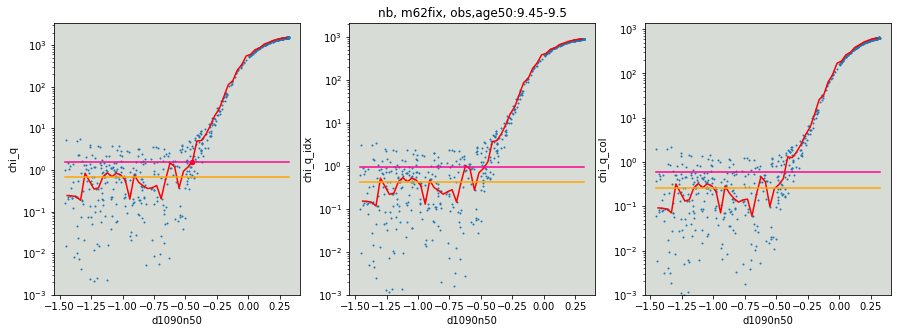

In [54]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9091tot, t_res9091=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,sigma1=sigma1,sigma2=sigma2,sigma3=sigma3,sigma4=sigma4,sigma5=sigma5,sigma6=sigma6,sigma7=sigma7,sigma8=sigma8,sigma9=sigma9,figsize=(15,5), title='nb, m62fix, obs,age50:9.45-9.5', ylim=[0.001,None], toll=0.01,sigma_obs=True )

d1090n50 limit: -0.4419921875
sigma_idx1: 0.017823119
sigma_idx2: 0.3430309
sigma_idx3: 0.040208675
sigma_idx4: 0.004084004
sigma_idx5: 0.050004993
sigma_col1: 0.02876198
sigma_col2: 0.010550404
sigma_col3: 0.0062533026
sigma_col4: 0.010317193


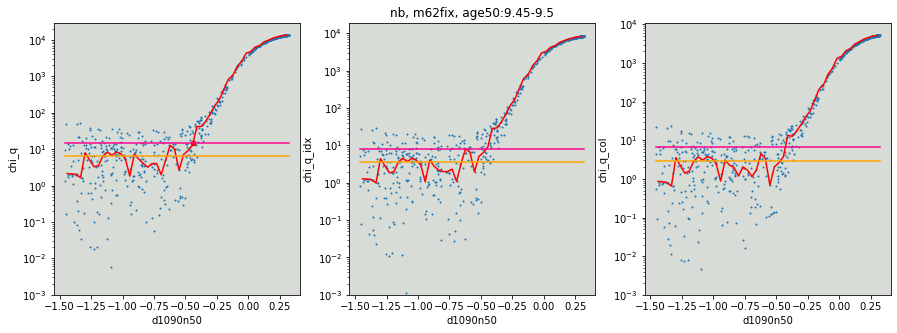

In [55]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9091tot, t_res9091=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, age50:9.45-9.5', ylim=[0.001,None], toll=0.01)

In [7]:
n_chunks=5
for i_chunks in range(2, n_chunks+1):
    _idx_file=work_dir+'sandage_varZ_v4.1_m62fix_noburst_100k_spec_dcombnull_idx_{:03d}.fits'
    _par_file=work_dir+'sandage_varZ_v4.1_m62fix_noburst_100k_spec_dcombnull_{:03d}_physpar_wagef.fits'
    
    _hdul_idx=fits.open(_idx_file.format(i_chunks))
    _hdul_par=fits.open(_par_file.format(i_chunks))

    _d4000n=_hdul_idx[1].data['D4000N'][...,4]
    _hdhg=_hdul_idx[1].data['HdHg'][...,4]
    _Hb=_hdul_idx[1].data['Lick_Hb'][...,4]
    _mg2fe=_hdul_idx[1].data['Mg2Fe'][...,4]
    _mgfep=_hdul_idx[1].data['MgFe_prime'][...,4]

    _mag_u=_hdul_par[1].data['ABMAG'][...,0]
    _mag_g=_hdul_par[1].data['ABMAG'][...,1]
    _mag_r=_hdul_par[1].data['ABMAG'][...,2]
    _mag_i=_hdul_par[1].data['ABMAG'][...,3]
    _mag_z=_hdul_par[1].data['ABMAG'][...,4]

    _age10=_hdul_par[1].data['age10']
    _age25=_hdul_par[1].data['age25']
    _age50=_hdul_par[1].data['age50']
    _age75=_hdul_par[1].data['age75']
    _age90=_hdul_par[1].data['age90']
    
    _sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
    _sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
    _sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
    _sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
    _sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']
    
    _sigma_u=hdul_pert[1].data['ERR_MAG_U']
    _sigma_g=hdul_pert[1].data['ERR_MAG_G']
    _sigma_r=hdul_pert[1].data['ERR_MAG_R']
    _sigma_i=hdul_pert[1].data['ERR_MAG_I']
    _sigma_z=hdul_pert[1].data['ERR_MAG_Z']
    
    sigma_D4000n=np.append(sigma_D4000n, _sigma_D4000n)
    sigma_hdhg=np.append(sigma_hdhg, _sigma_hdhg)
    sigma_Hb=np.append(sigma_Hb, _sigma_Hb)
    sigma_mgfep=np.append(sigma_mgfep, _sigma_mgfep)
    sigma_mg2fe=np.append(sigma_mg2fe, _sigma_mg2fe)
    
    sigma_u=np.append(sigma_u, _sigma_u)
    sigma_g=np.append(sigma_g, _sigma_g)
    sigma_r=np.append(sigma_r, _sigma_r)
    sigma_i=np.append(sigma_i, _sigma_i)
    sigma_z=np.append(sigma_z, _sigma_z)

    
    d4000n=np.append(d4000n, _d4000n)
    hdhg=np.append(hdhg, _hdhg)
    Hb=np.append(Hb, _Hb)
    mg2fe=np.append(mg2fe, _mg2fe)
    mgfep=np.append(mgfep, _mgfep)
    
    mag_u=np.append(mag_u, _mag_u)
    mag_g=np.append(mag_g, _mag_g)
    mag_r=np.append(mag_r, _mag_r)
    mag_i=np.append(mag_i, _mag_i)
    mag_z=np.append(mag_z, _mag_z)
    
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)
    
    
d1090n50=np.log10((age10-age90)/age50)

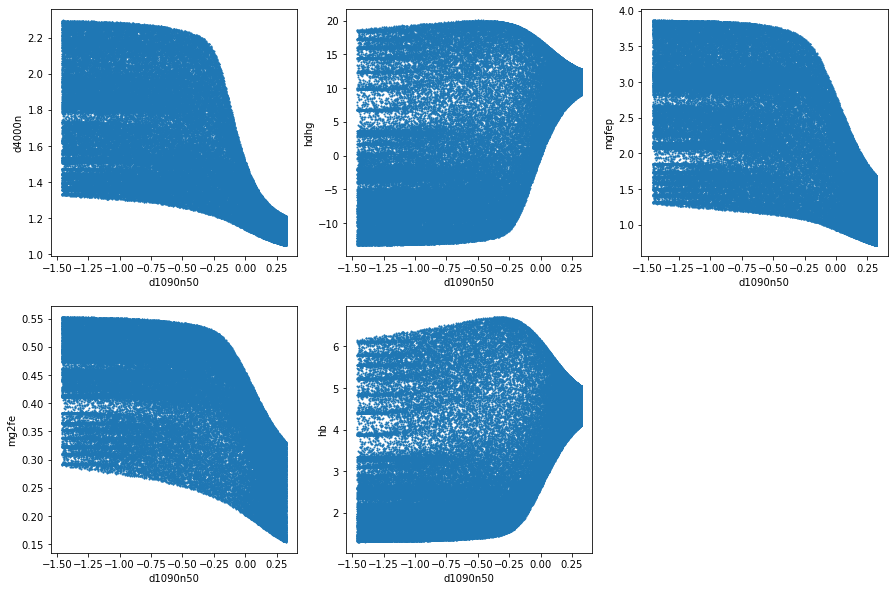

In [8]:
fig_res_tot=f_plt.idx_resol(d1090n50,d4000n,hdhg, mgfep, mg2fe, Hb, par_name='d1090n50', idx_name=['d4000n', 'hdhg', 'mgfep', 'mg2fe', 'hb'], figsize=(15,10))

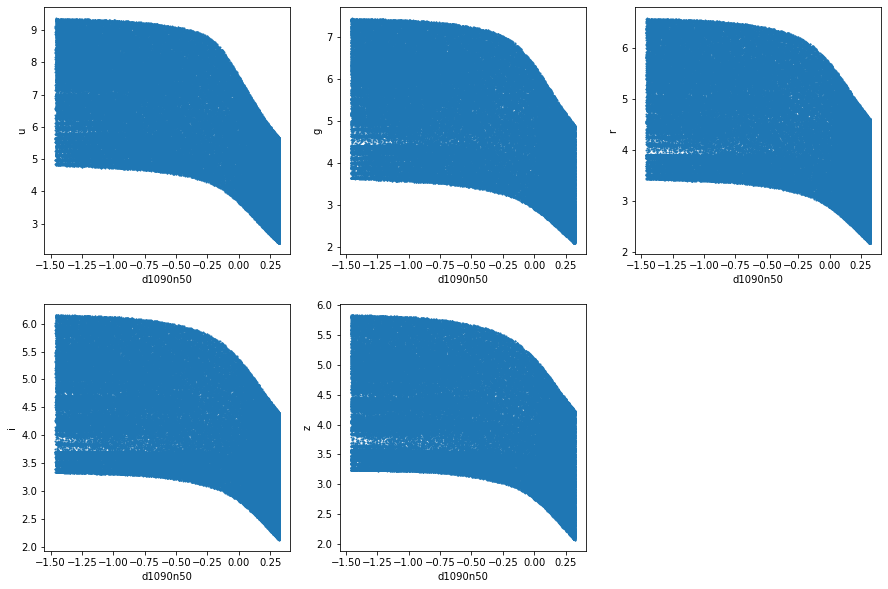

In [9]:
fig_res_tot_mag=f_plt.idx_resol(d1090n50,mag_u,mag_g, mag_r, mag_i, mag_z, par_name='d1090n50', idx_name=['u', 'g', 'r', 'i', 'z'], figsize=(15,10))

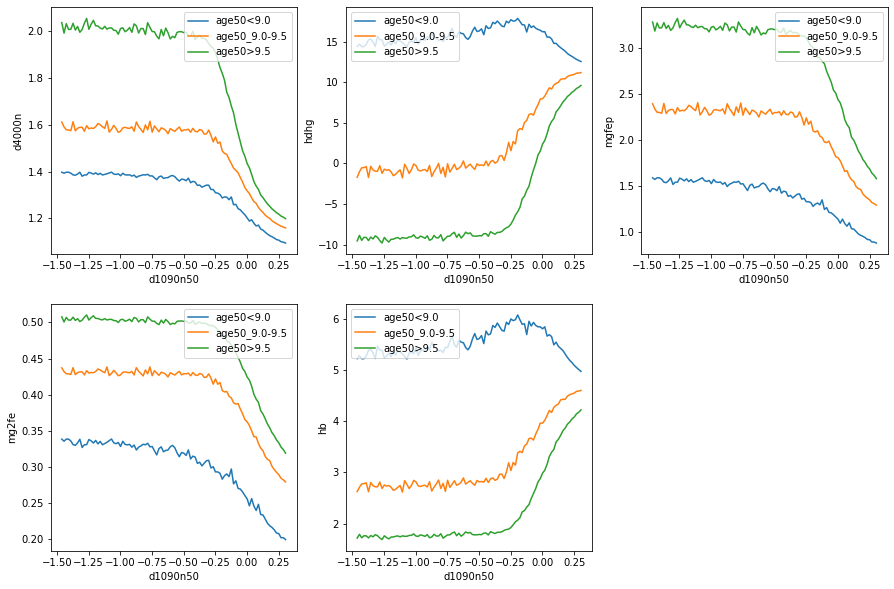

In [10]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50,idx_sel1,idx_sel2,idx_sel3,d4000n,hdhg, mgfep, mg2fe, Hb, x_name='d1090n50',par_name=['age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['d4000n', 'hdhg', 'mgfep', 'mg2fe', 'hb'],bins=100, figsize=(15,10))

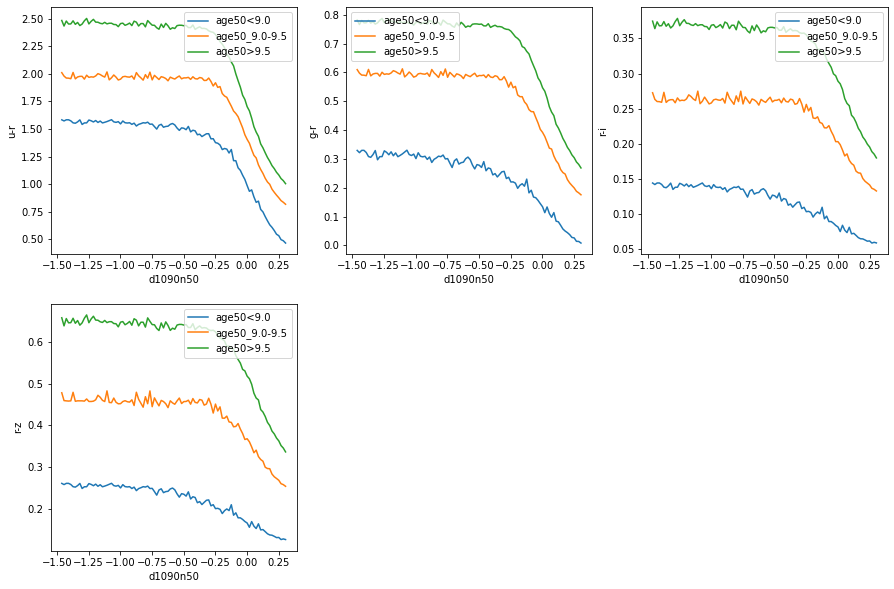

In [11]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol_col=f_plt.idx_resol_stat4col(d1090n50,idx_sel1,idx_sel2,idx_sel3,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z,figsize=(15,10), bins=100)

d1090n50 limit: -0.42402343750000004
sigma_idx1: 0.00848197
sigma_idx2: 0.70457375
sigma_idx3: 0.13341677
sigma_idx4: 0.0051989304
sigma_idx5: 0.026996607
sigma_col1: 0.021193
sigma_col2: 0.015854187
sigma_col3: 0.0033486064
sigma_col4: 0.0051287315


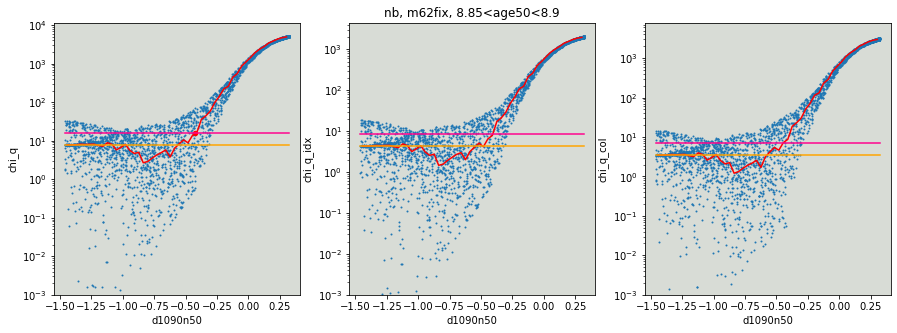

In [12]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.9)& (np.log10(age50)>8.85))
idx_sel=((np.log10(age50)<8.9)& (np.log10(age50)>8.85))
fig_9091tot, t_res9091=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, 8.85<age50<8.9', ylim=[0.001,None], toll=0.01)

sigma idx1: 0.00848197
sigma idx2: 0.70457375
sigma idx3: 0.13341677
sigma idx4: 0.0051989304
sigma idx5: 0.026996607


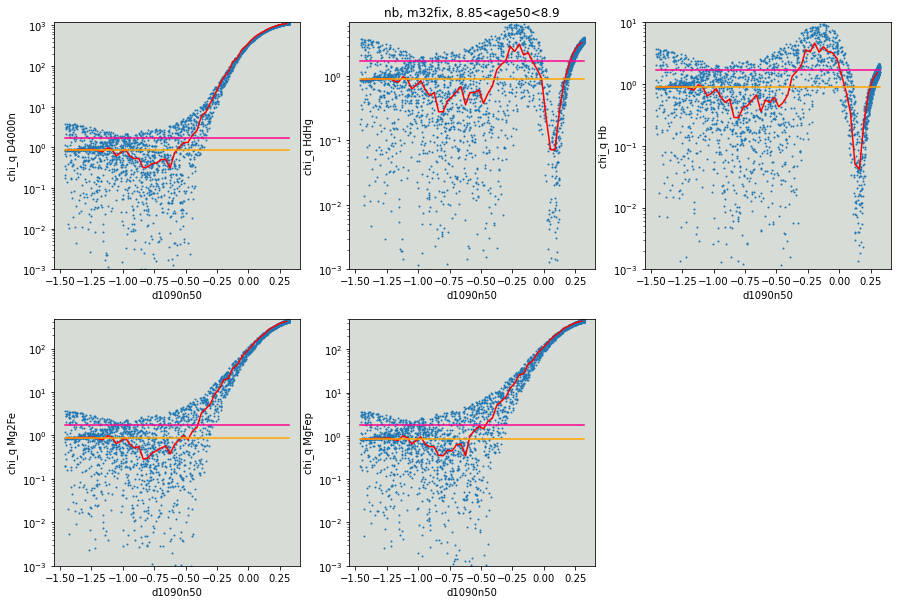

In [13]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.9)& (np.log10(age50)>8.85))
idx_sel=((np.log10(age50)<8.9)& (np.log10(age50)>8.85))
fig_9091idx=f_plt.chi_q_comp_idx(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep, idx_sel,idx_ref,figsize=(15,10), title='nb, m32fix, 8.85<age50<8.9', ylim=[0.001, None])

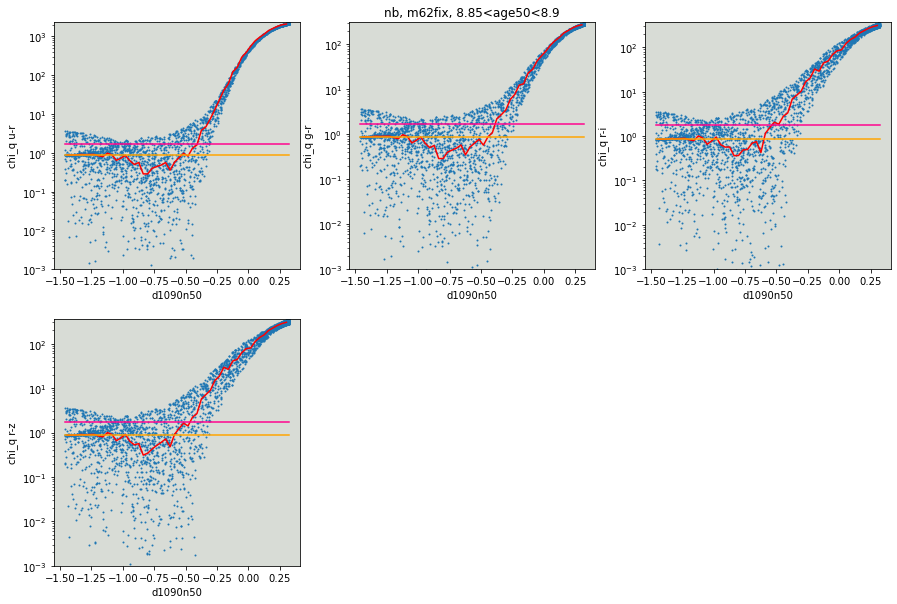

In [14]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.9)& (np.log10(age50)>8.85))
idx_sel=((np.log10(age50)<8.9)& (np.log10(age50)>8.85))
fig_9091col=f_plt.chi_q_comp_col(d1090n50,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 8.85<age50<8.9', ylim=[0.001,None])

d1090n50 limit: -0.4330078125000001
sigma_idx1: 0.018050943
sigma_idx2: 0.34690455
sigma_idx3: 0.040844895
sigma_idx4: 0.0041385544
sigma_idx5: 0.05053809
sigma_col1: 0.029214641
sigma_col2: 0.0107029965
sigma_col3: 0.0062650144
sigma_col4: 0.010424805


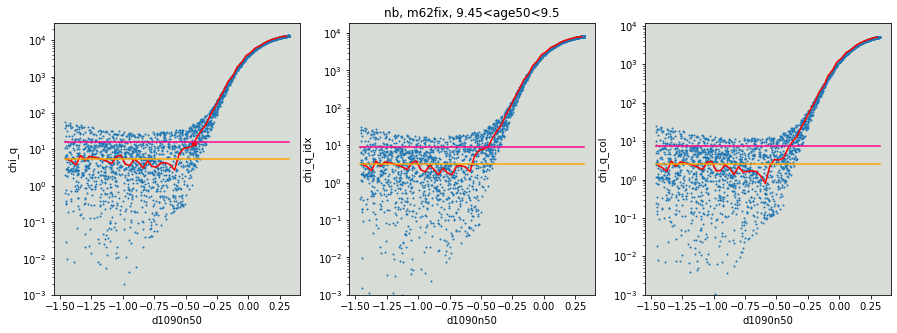

In [15]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9495tot, t_res9495=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, 9.45<age50<9.5', ylim=[0.001,None], toll=0.01)

sigma idx1: 0.018050943
sigma idx2: 0.34690455
sigma idx3: 0.040844895
sigma idx4: 0.0041385544
sigma idx5: 0.05053809


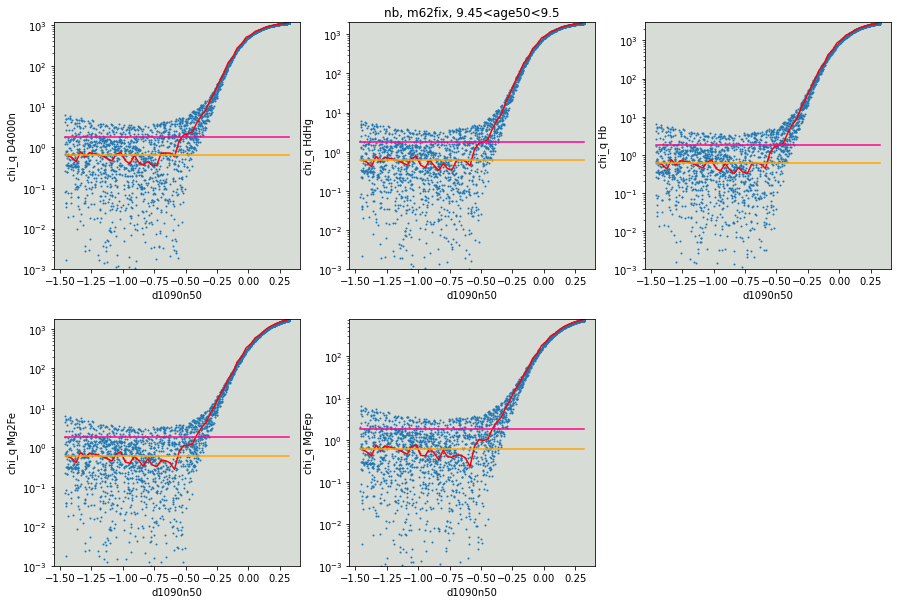

In [16]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9495idx=f_plt.chi_q_comp_idx(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.45<age50<9.5', ylim=[0.001,None])

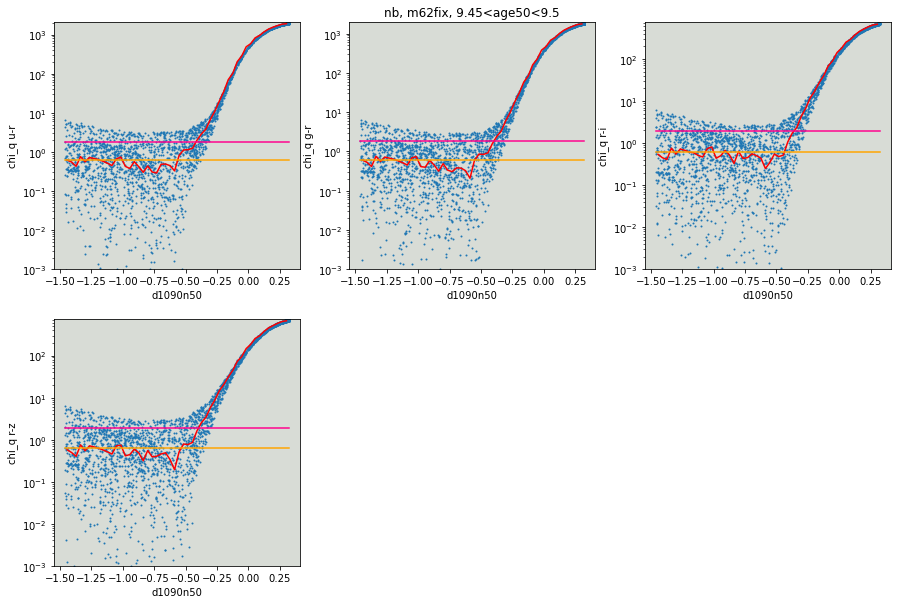

In [17]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9495col=f_plt.chi_q_comp_col(d1090n50,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.45<age50<9.5', ylim=[0.001,None])

d1090n50 limit: -0.4419921875
sigma_idx1: 0.0077495915
sigma_idx2: 0.124505974
sigma_idx3: 0.014683842
sigma_idx4: 0.00074026897
sigma_idx5: 0.0075088423
sigma_col1: 0.008107498
sigma_col2: 0.0027995037
sigma_col3: 0.0014020496
sigma_col4: 0.0022389754


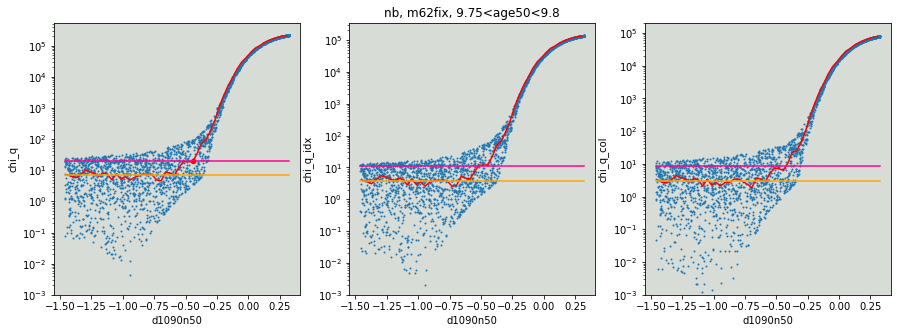

In [18]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.8)& (np.log10(age50)>9.75))
idx_sel=((np.log10(age50)<9.8)& (np.log10(age50)>9.75))
fig_9798tot, t_res9798=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, 9.75<age50<9.8', ylim=[0.001,None], toll=0.01)

sigma idx1: 0.0077495915
sigma idx2: 0.124505974
sigma idx3: 0.014683842
sigma idx4: 0.00074026897
sigma idx5: 0.0075088423


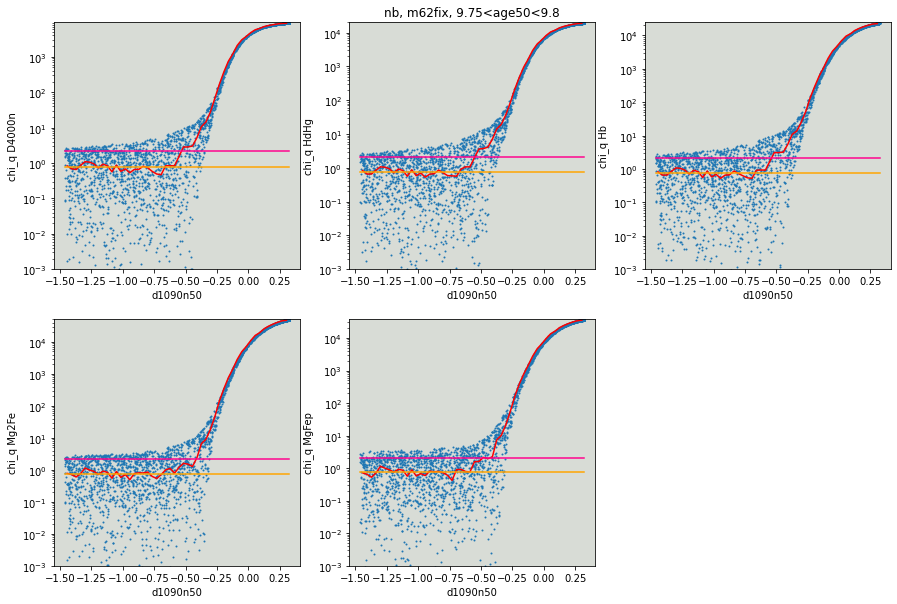

In [19]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.8)& (np.log10(age50)>9.75))
idx_sel=((np.log10(age50)<9.8)& (np.log10(age50)>9.75))
fig_9798idx=f_plt.chi_q_comp_idx(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.75<age50<9.8', ylim=[0.001,None])

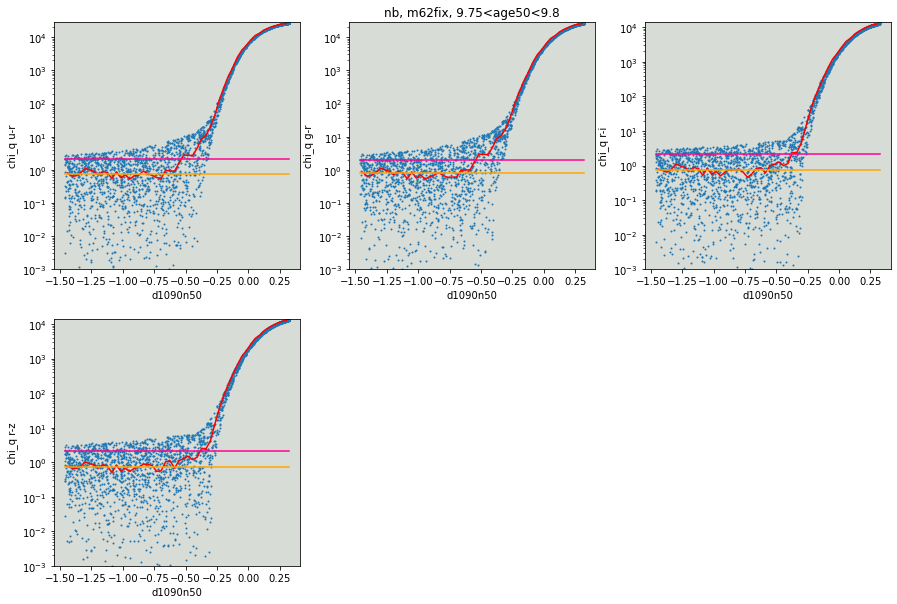

In [20]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.8)& (np.log10(age50)>9.75))
idx_sel=((np.log10(age50)<9.8)& (np.log10(age50)>9.75))
fig_9798col=f_plt.chi_q_comp_col(d1090n50,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.75<age50<9.8', ylim=[0.001,None])

In [21]:
bins=30
bin_age50=np.histogram(np.log10(age50), bins=bins, range=(8.65, 10.15))[1]

In [22]:
np.size(bin_age50)

31

In [23]:
t_res=np.array([0.0]*bins)

age50 bin: 8.65 - 8.7
d1090n50 limit: -0.9589614868164062
sigma_idx1: 0.0067117307
sigma_idx2: 0.21184993
sigma_idx3: 0.06379913
sigma_idx4: 0.004232802
sigma_idx5: 0.020160835
sigma_col1: 0.014756648
sigma_col2: 0.008179711
sigma_col3: 0.0037785051
sigma_col4: 0.0061207903

age50 bin: 8.7 - 8.75
d1090n50 limit: -0.36989593505859375
sigma_idx1: 0.009232998
sigma_idx2: 0.45743662
sigma_idx3: 0.114735164
sigma_idx4: 0.006506227
sigma_idx5: 0.03580337
sigma_col1: 0.02565334
sigma_col2: 0.015065914
sigma_col3: 0.008076947
sigma_col4: 0.012442667

age50 bin: 8.75 - 8.8
d1090n50 limit: -0.47228240966796875
sigma_idx1: 0.0061648805
sigma_idx2: 0.4315335
sigma_idx3: 0.09090049
sigma_idx4: 0.0045948997
sigma_idx5: 0.031102788
sigma_col1: 0.019605106
sigma_col2: 0.011846038
sigma_col3: 0.0053526363
sigma_col4: 0.007971382

age50 bin: 8.8 - 8.85
d1090n50 limit: -0.46274566650390625
sigma_idx1: 0.007582358
sigma_idx2: 0.55837977
sigma_idx3: 0.1108146
sigma_idx4: 0.005263623
sigma_idx5: 0.03259777


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:727: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(1,3,figsize=figsize)


d1090n50 limit: -0.46518707275390625
sigma_idx1: 0.008957832
sigma_idx2: 0.16310814
sigma_idx3: 0.019230664
sigma_idx4: 0.00074904104
sigma_idx5: 0.0060912073
sigma_col1: 0.011033509
sigma_col2: 0.003916331
sigma_col3: 0.0014402678
sigma_col4: 0.0027101897

age50 bin: 9.75 - 9.8
d1090n50 limit: -0.44283294677734375
sigma_idx1: 0.0077495915
sigma_idx2: 0.124505974
sigma_idx3: 0.014683842
sigma_idx4: 0.00074026897
sigma_idx5: 0.0075088423
sigma_col1: 0.008107498
sigma_col2: 0.0027995037
sigma_col3: 0.0014020496
sigma_col4: 0.0022389754

age50 bin: 9.8 - 9.85
d1090n50 limit: -0.40399932861328125
sigma_idx1: 0.008617204
sigma_idx2: 0.13658969
sigma_idx3: 0.016730828
sigma_idx4: 0.0014196823
sigma_idx5: 0.017153723
sigma_col1: 0.01067305
sigma_col2: 0.0035183968
sigma_col3: 0.0023899034
sigma_col4: 0.0043657296

age50 bin: 9.85 - 9.9
d1090n50 limit: -0.40956878662109375
sigma_idx1: 0.011071575
sigma_idx2: 0.16954413
sigma_idx3: 0.019052194
sigma_idx4: 0.0017721908
sigma_idx5: 0.024020512
si

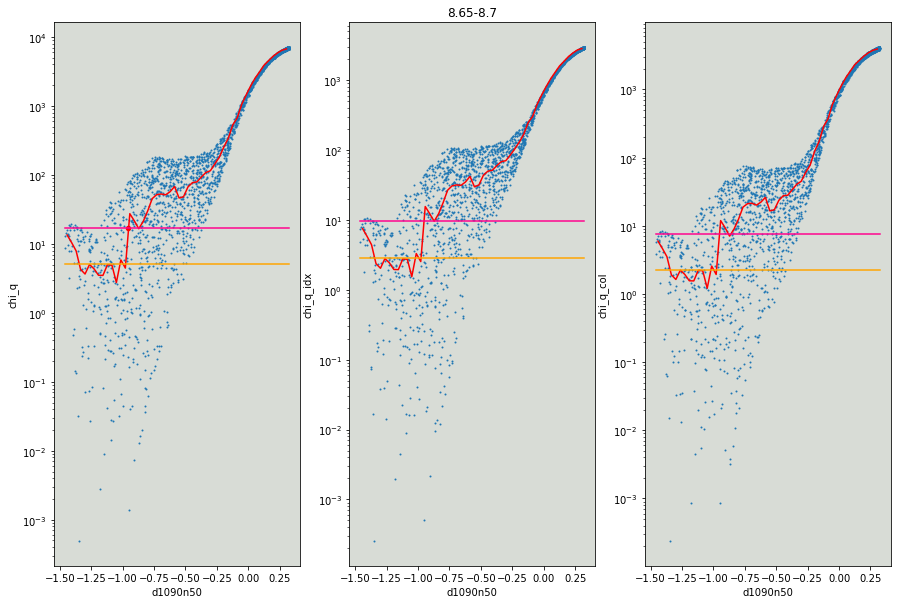

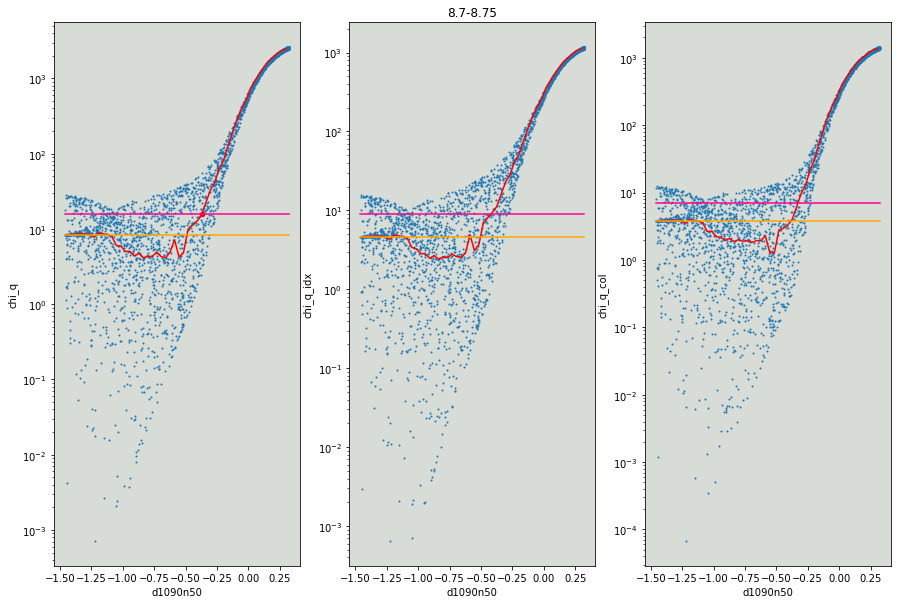

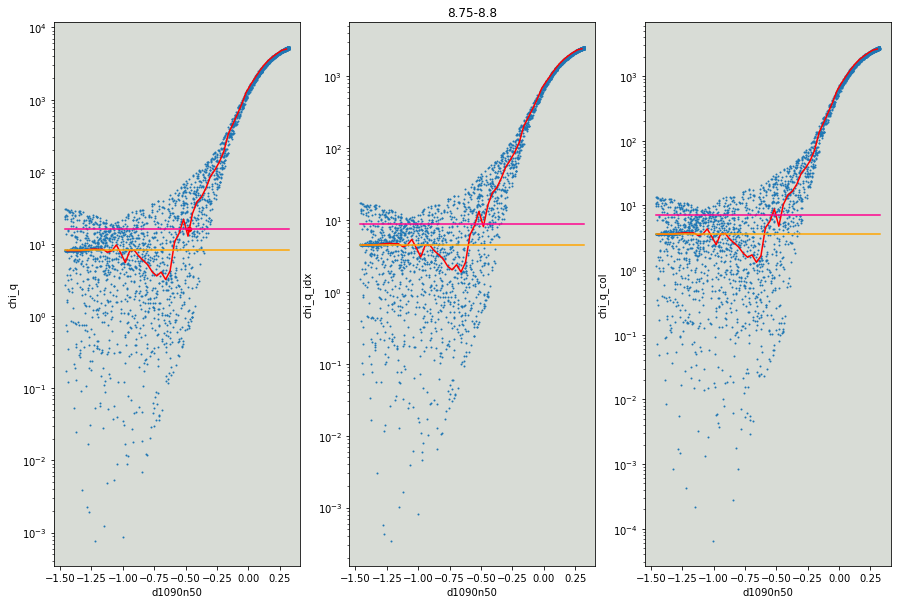

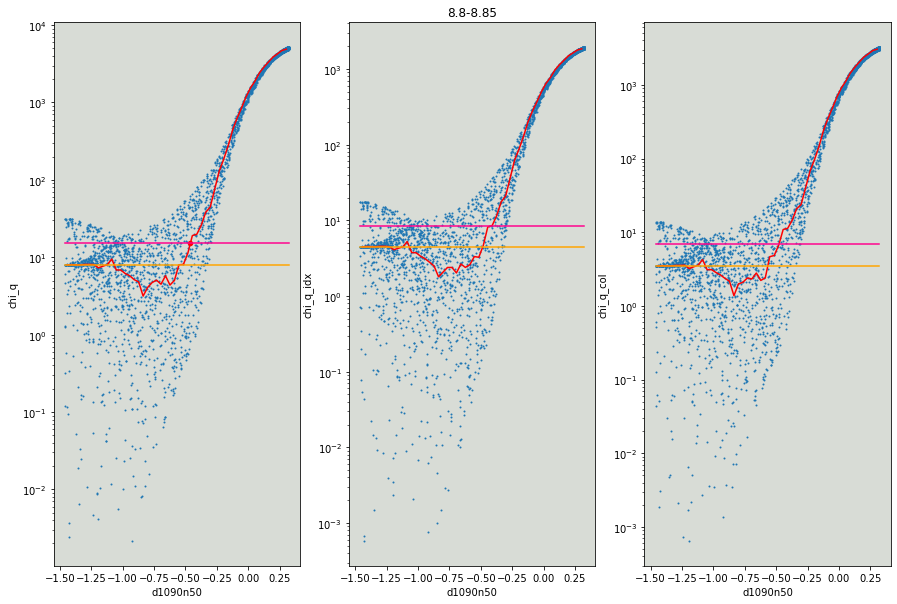

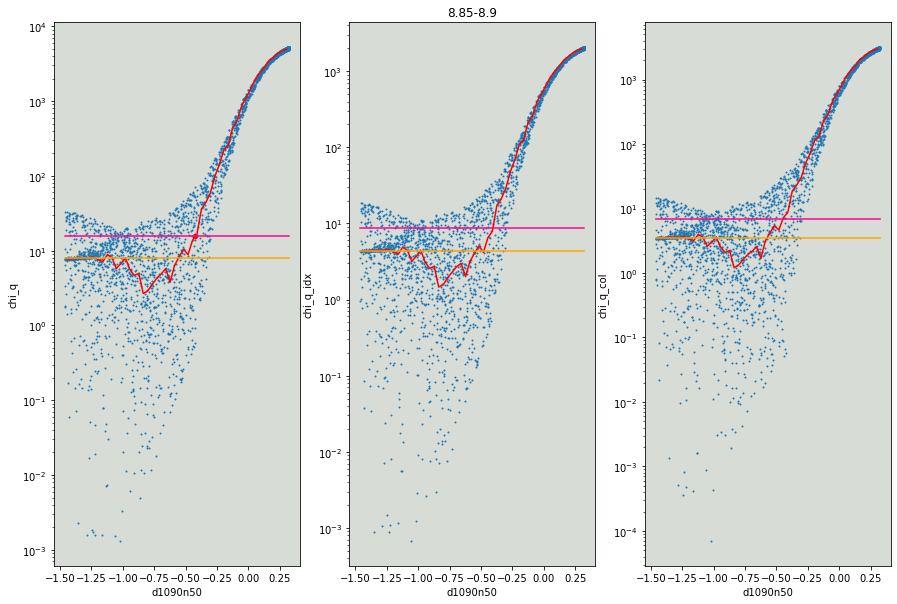

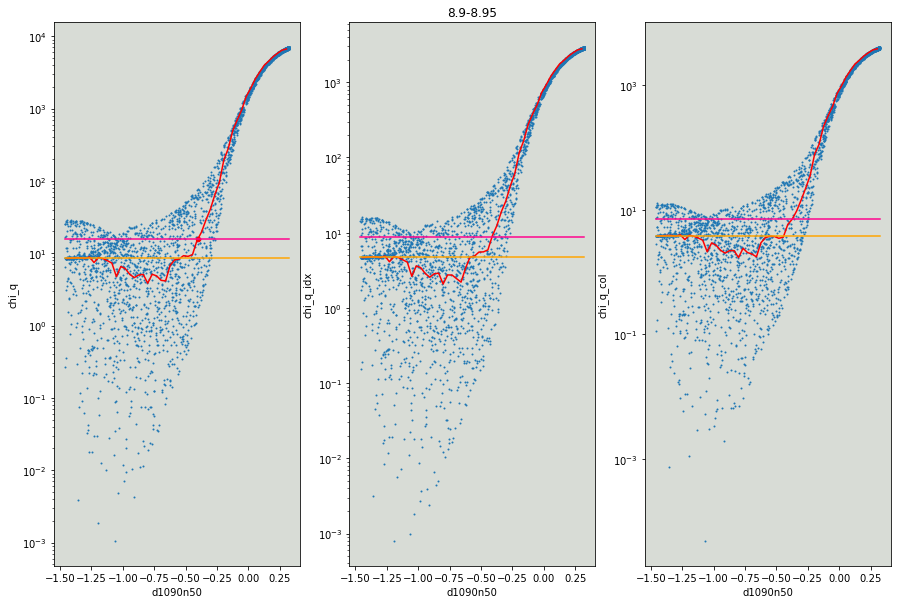

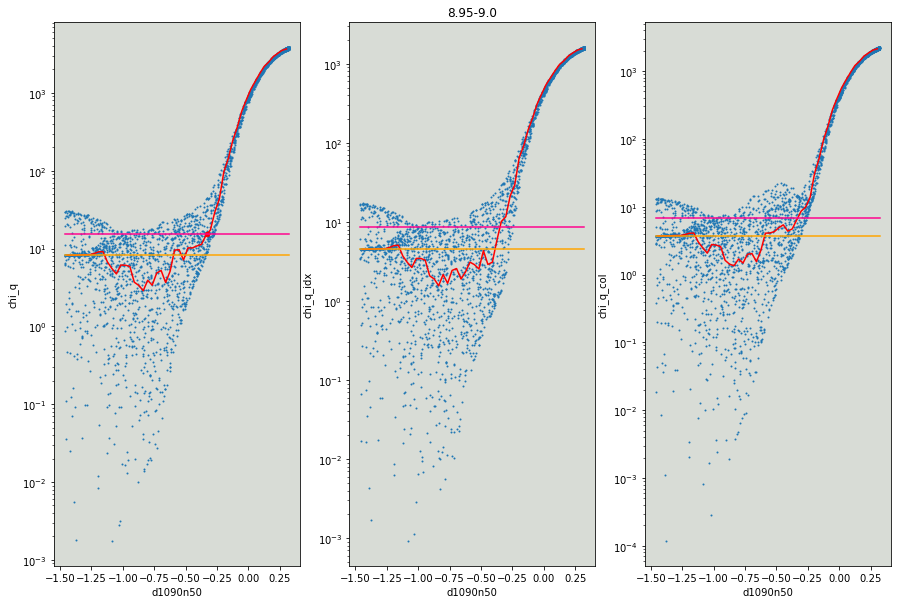

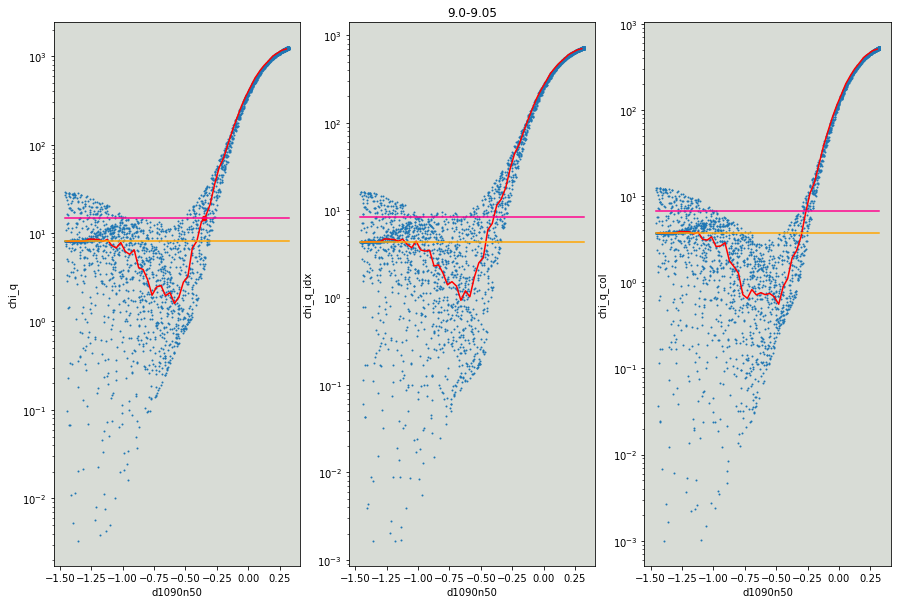

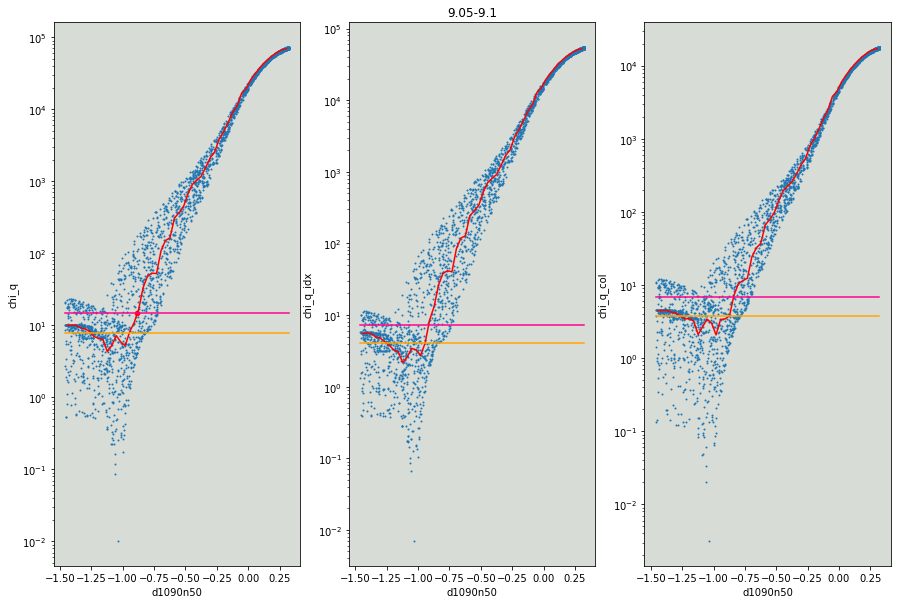

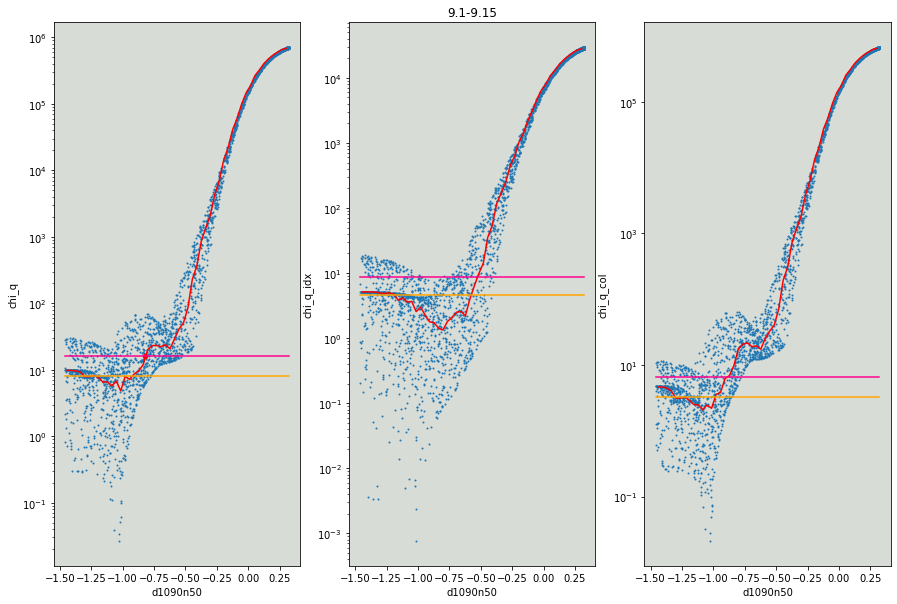

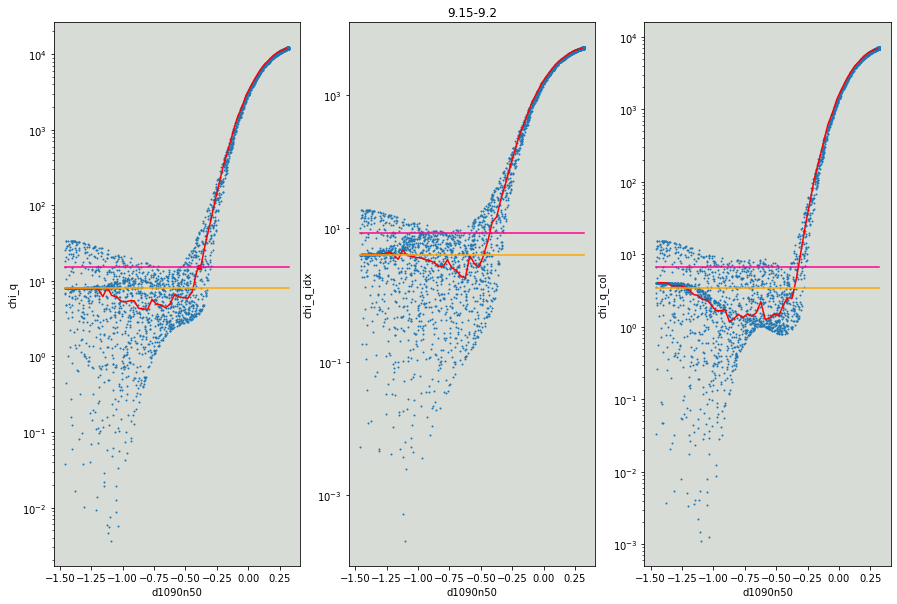

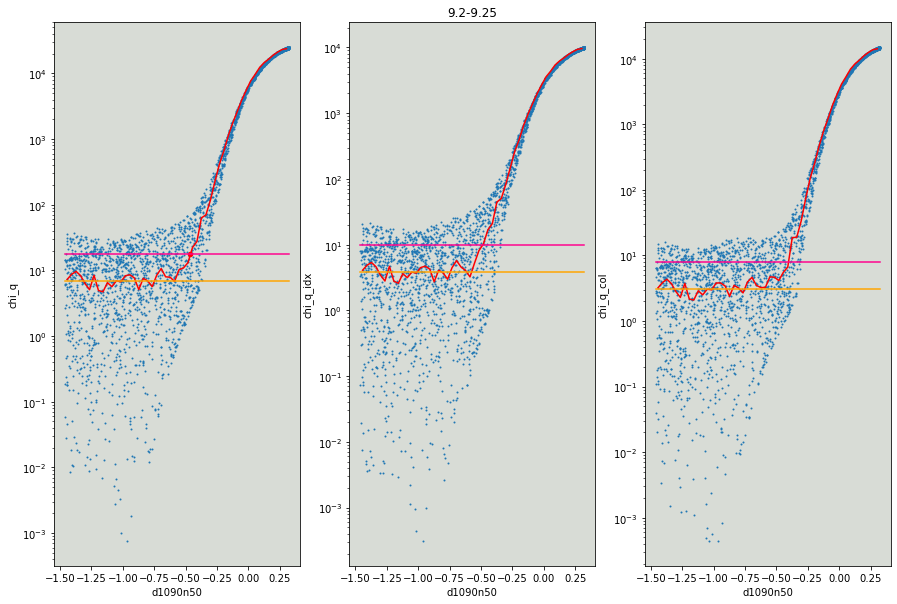

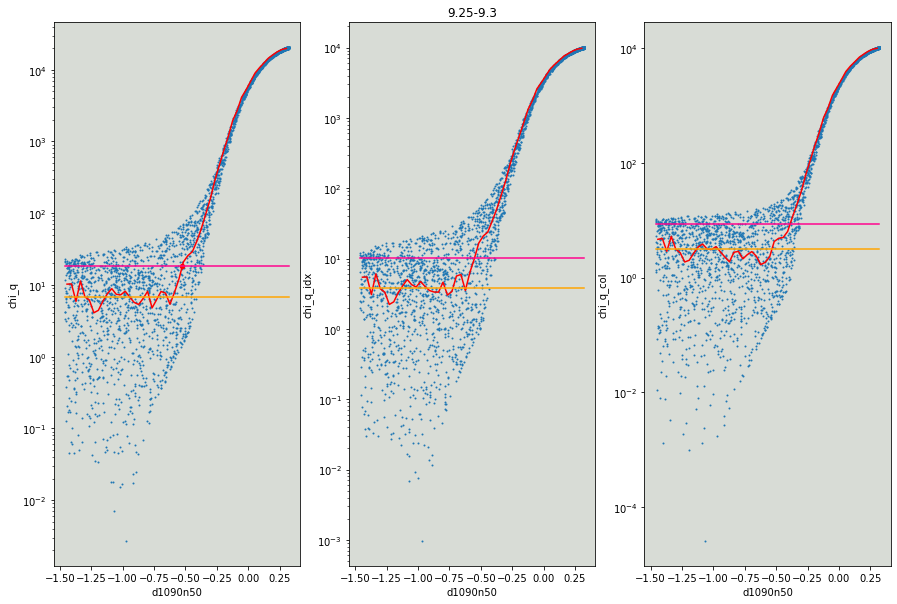

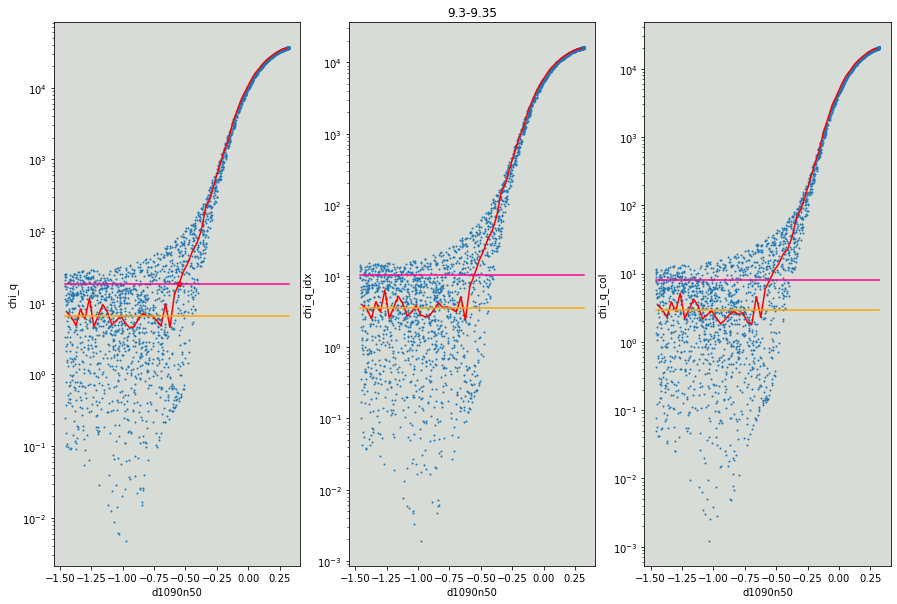

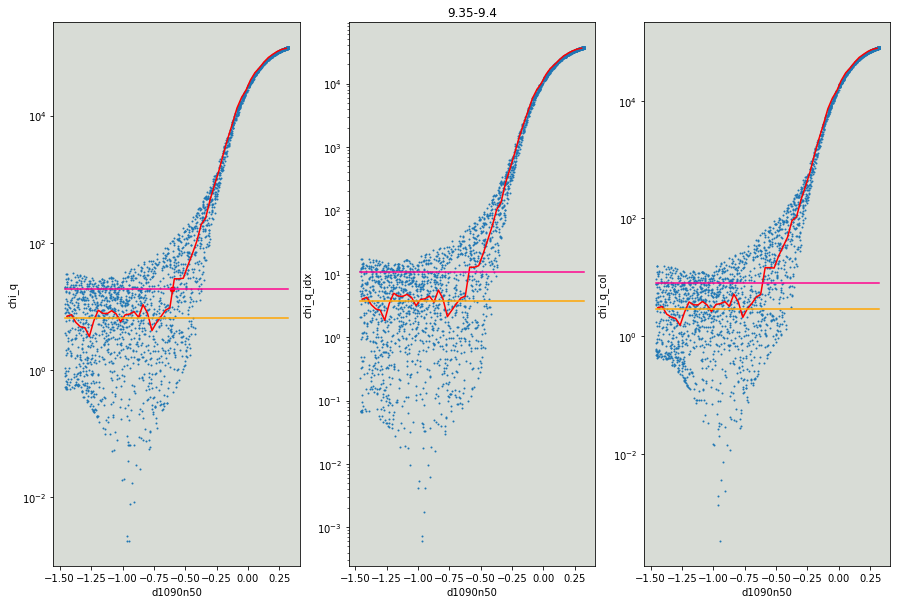

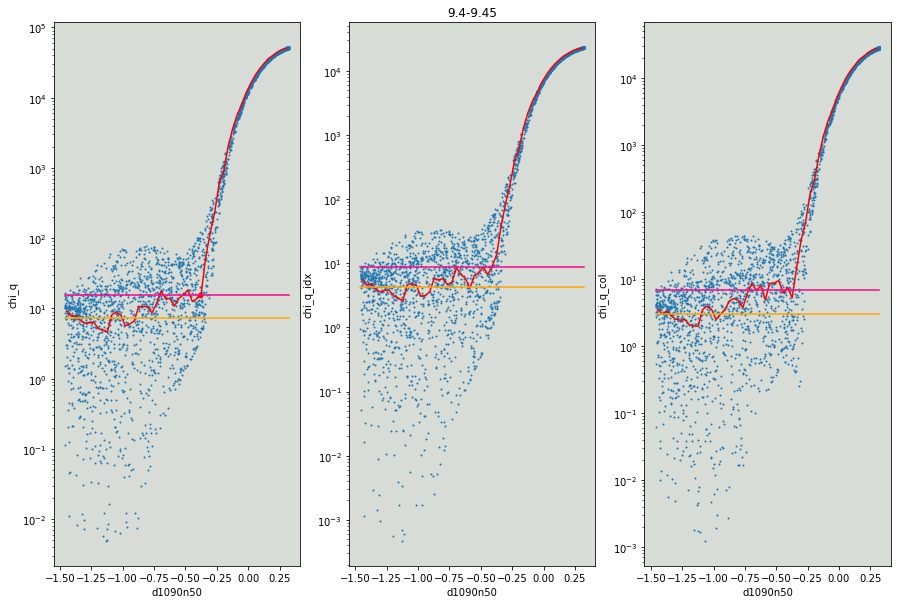

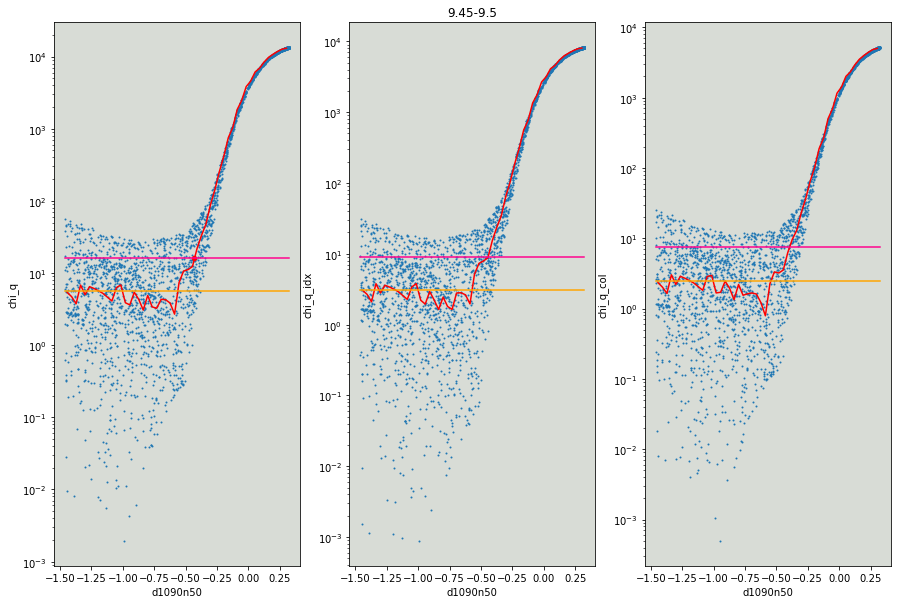

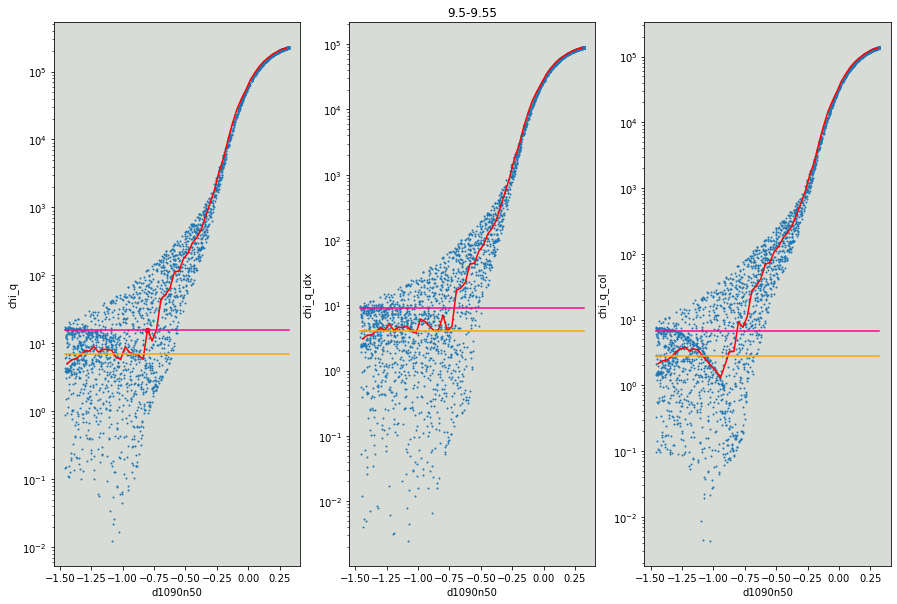

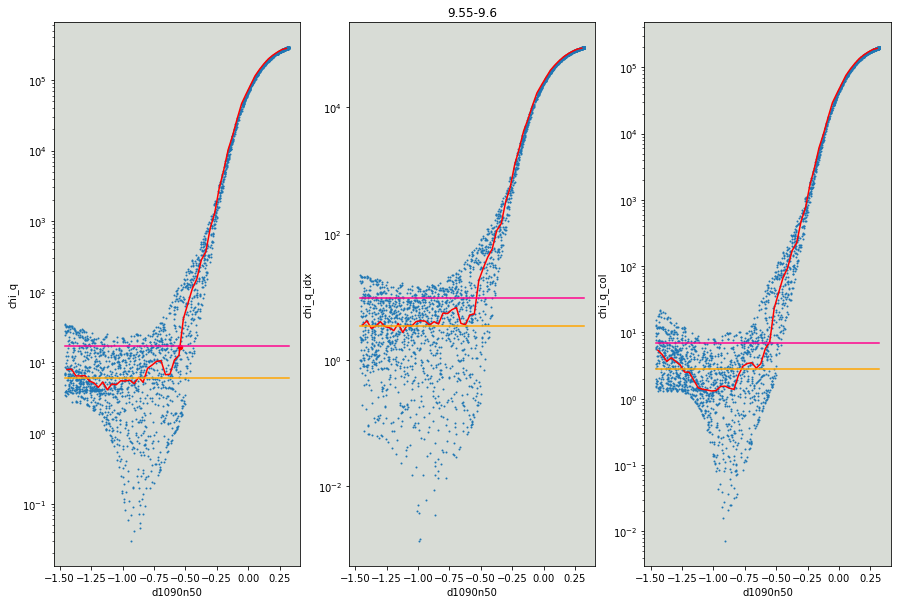

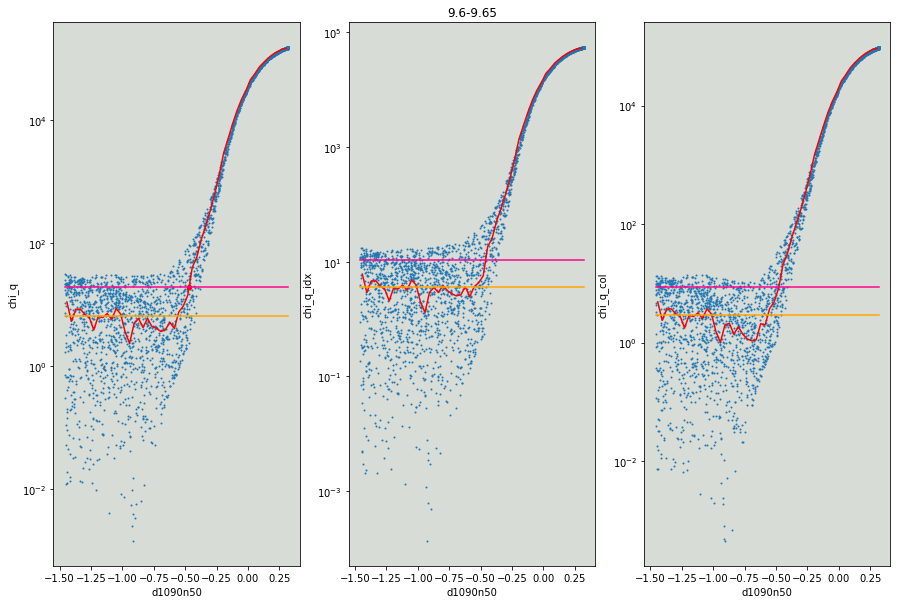

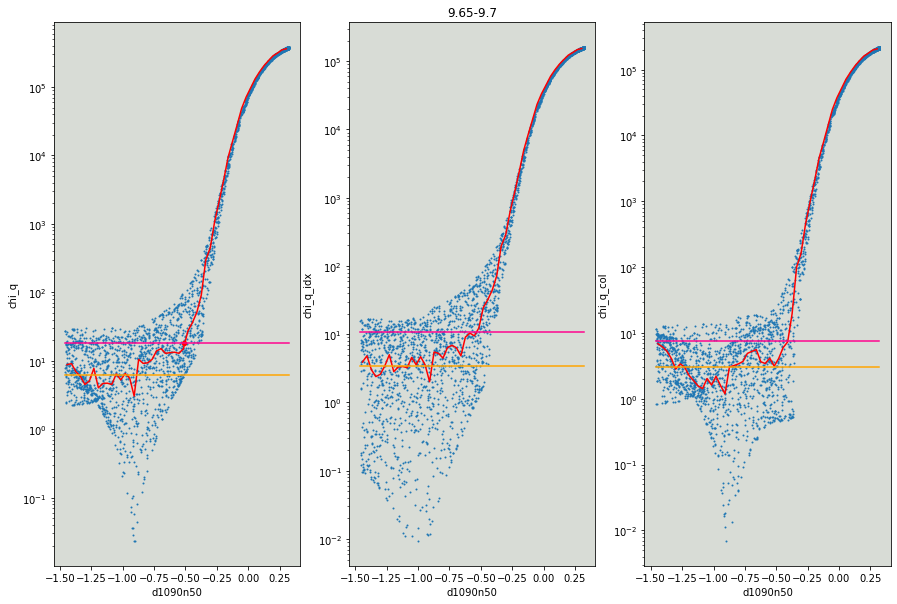

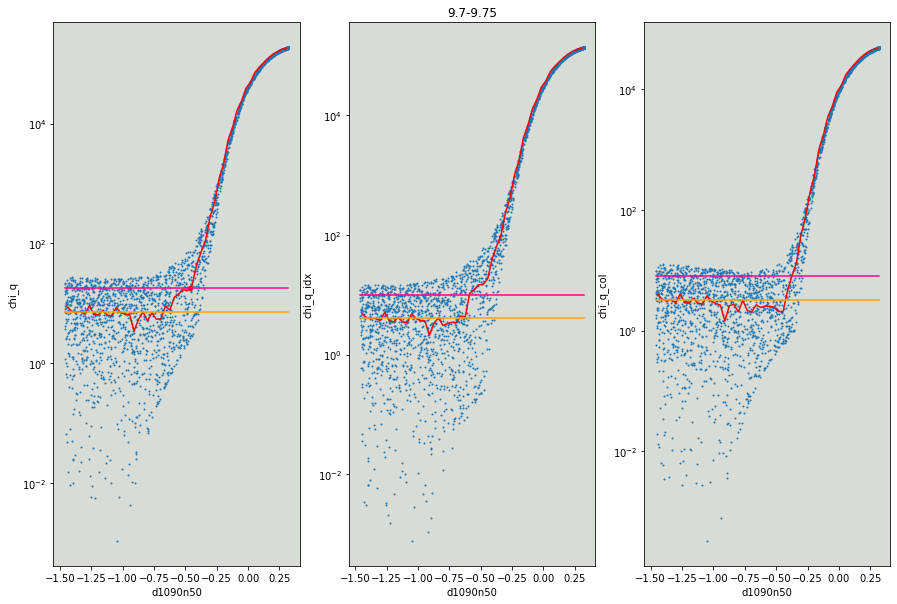

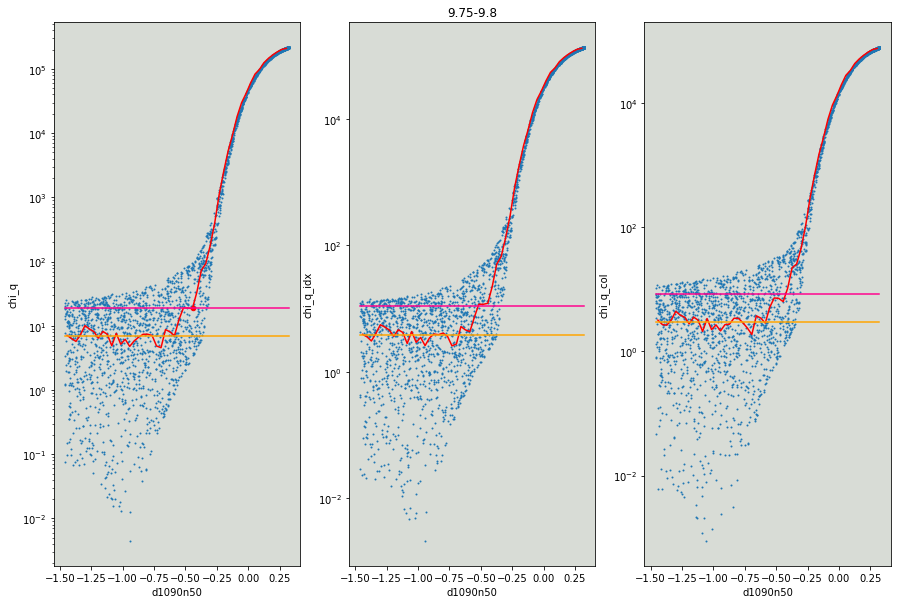

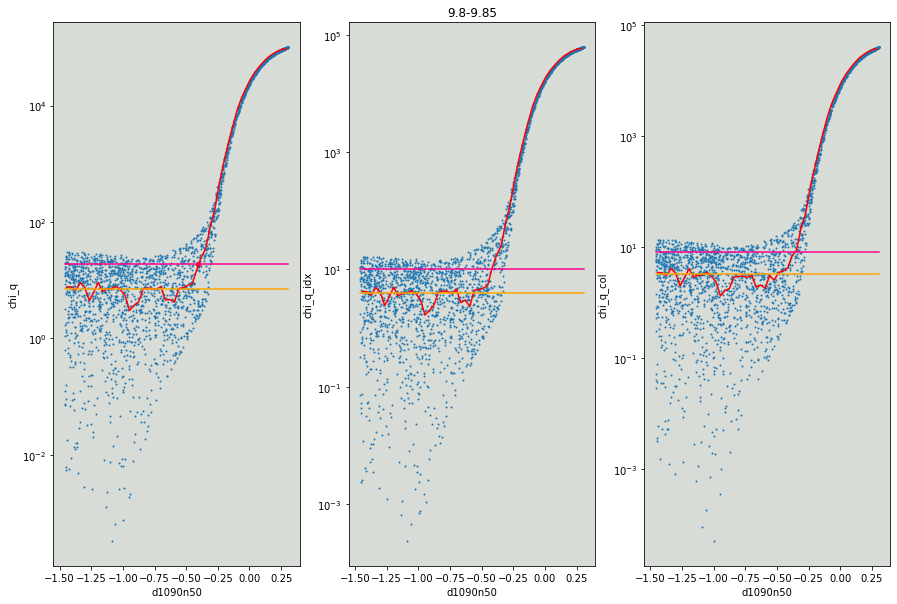

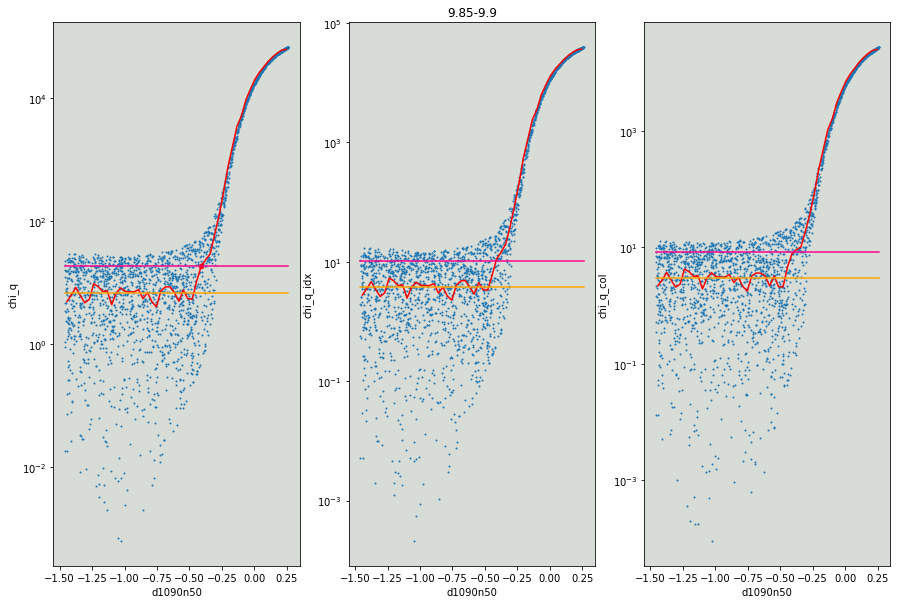

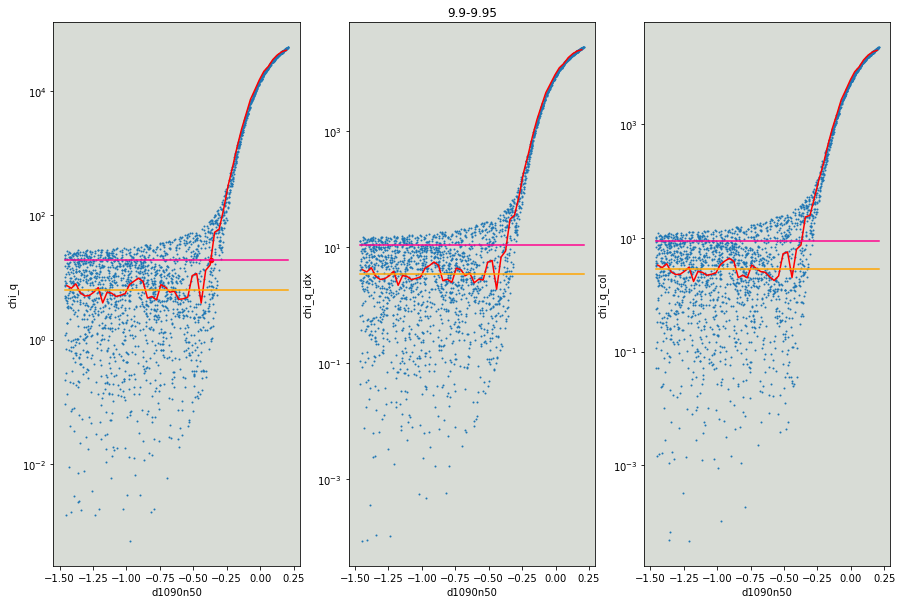

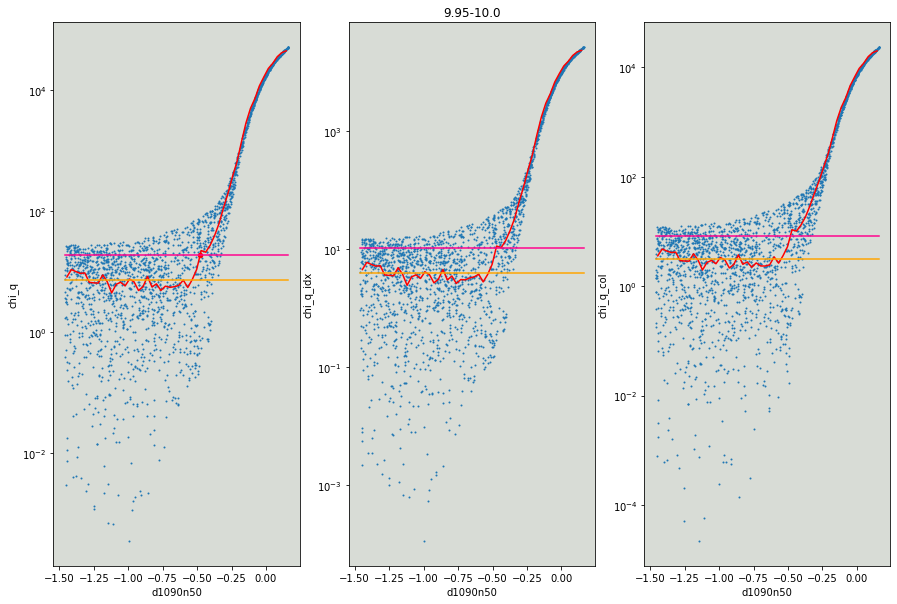

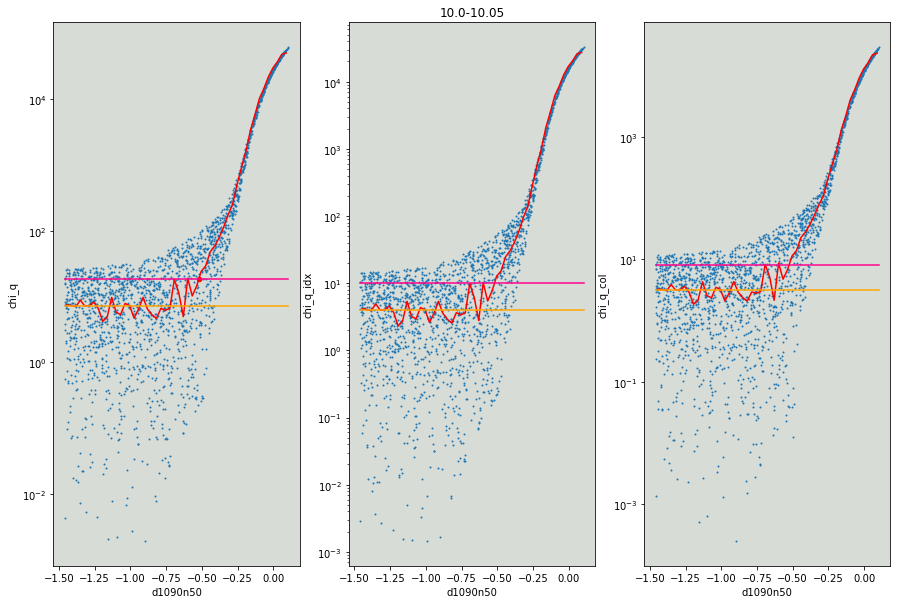

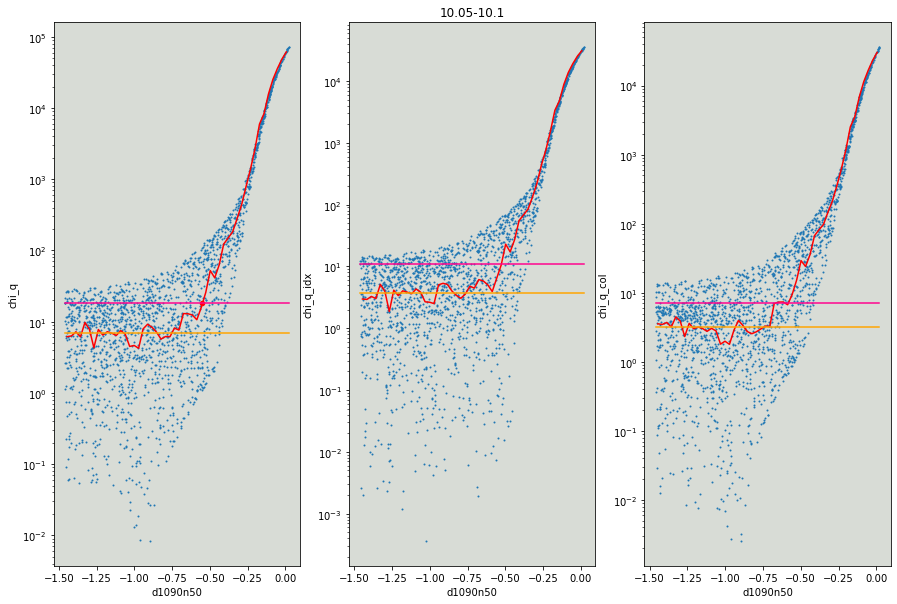

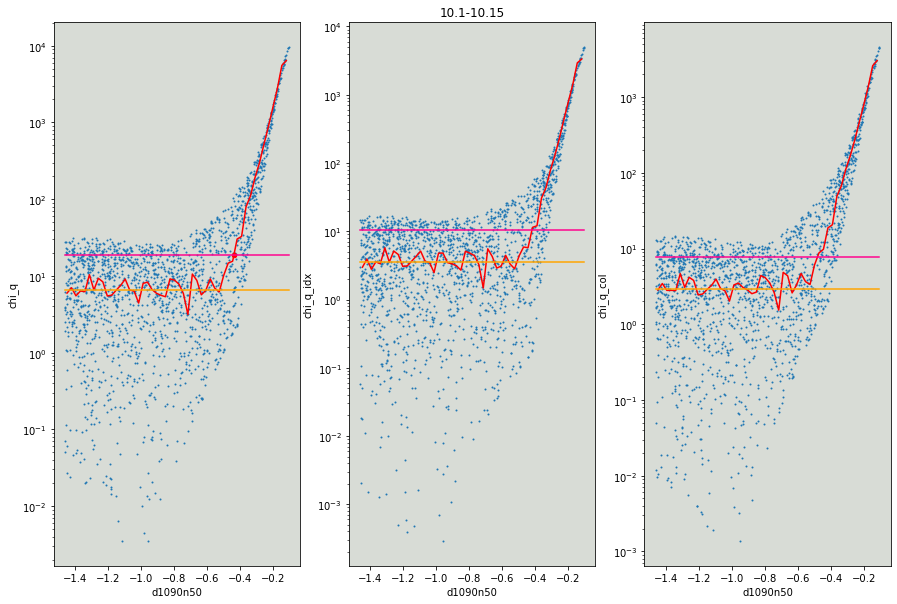

In [24]:
for i in range(0, bins):
    idx_ref=((d1090n50<-1.0)&(np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
    idx_sel=((np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
    print('age50 bin:', bin_age50[i],'-', bin_age50[i+1])
    fig,t_res[i]=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref, title=str(bin_age50[i])+'-'+str(bin_age50[i+1]), toll=0.0001, xmin=-1.5)
    
    print('')

d1090n50 limit: -0.38458251953125
sigma_idx1: 0.010612908
sigma_idx2: 0.2059419
sigma_idx3: 0.02517245
sigma_idx4: 0.002024606
sigma_idx5: 0.023366744
sigma_col1: 0.013918064
sigma_col2: 0.0040860153
sigma_col3: 0.0021248646
sigma_col4: 0.0040522683


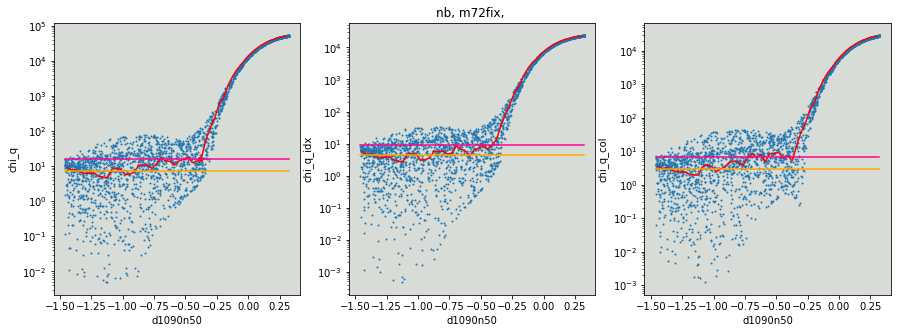

In [25]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<9.45)& (np.log10(age50)>9.4))
idx_sel=((np.log10(age50)<9.45)& (np.log10(age50)>9.4))
fig,t_res_val=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m72fix, ',xmin=-1.5, toll=0.001)

In [26]:
np.sum(((d1090n50<-1.0)&(np.log10(age50)<10.15)& (np.log10(age50)>10.1) &(t_form<10.15)))

486

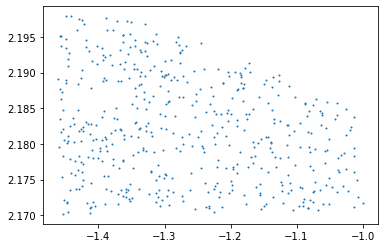

In [27]:
idx=((d1090n50<-1.0)&(np.log10(age50)<10.15)& (np.log10(age50)>10.1) &(t_form<10.15))
plt.scatter(d1090n50[idx], d4000n[idx], s=1)

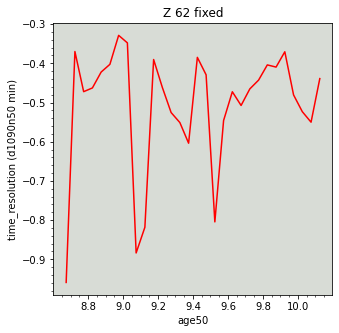

In [28]:
age50_binned=[0.0]*bins
for i in range(0, bins):
    age50_binned[i]=(bin_age50[i]+bin_age50[i+1])/2.0
    


fig, axs=plt.subplots(figsize=(5,5))
axs.plot(age50_binned, t_res, color='red')
axs.set_xlabel('age50')
axs.set_ylabel('time_resolution (d1090n50 min)')
axs.set_title('Z '+z+' fixed')
axs.minorticks_on()
axs.set_facecolor('#d8dcd6')

In [29]:
z32=-1.69897
z42=-0.69897
z52=-0.39794
z62=0.0
z72=0.39794

In [30]:
Z=[z32,z42,z52,z62,z72]

In [31]:
bin_z=np.histogram(Z, bins=5)[1]

In [32]:
bin_z

array([-1.69897 , -1.279588, -0.860206, -0.440824, -0.021442,  0.39794 ])

In [33]:
x,y=np.meshgrid(bin_age50, bin_z)

In [34]:
np.shape(y)

(6, 31)

In [35]:
time_res_file=work_dir+'Time_resol_Zfix.fits'
list_t=fits.open(time_res_file)

In [36]:
list_t.info()

Filename: /home/edoardo/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_bc03MILES_100k/Time_resol_Zfix.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     18   30R x 5C   [D, D, D, D, D]   


In [37]:
table_t_res=(list_t[1].data)

In [38]:
t_32=table_t_res['Log_d1090n50_min_z32']
t_42=table_t_res['Log_d1090n50_min_z42']
t_52=table_t_res['Log_d1090n50_min_z52']
t_62=table_t_res['Log_d1090n50_min_z62']
t_72=table_t_res['Log_d1090n50_min_z72']

[Text(0, -1.75, ''),
 Text(0, -1.5, ''),
 Text(0, -1.25, ''),
 Text(0, -1.0, ''),
 Text(0, -0.75, ''),
 Text(0, -0.5, ''),
 Text(0, -0.25, ''),
 Text(0, 0.0, ''),
 Text(0, 0.25, ''),
 Text(0, 0.5, '')]

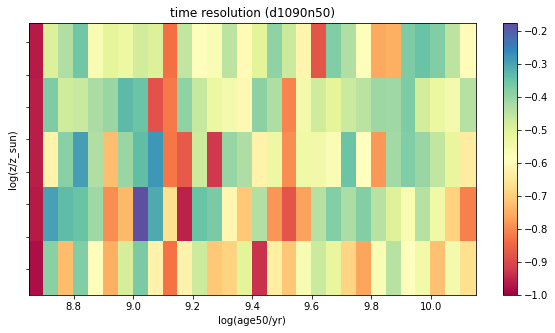

In [39]:
fig, ax=plt.subplots(figsize=(10,5))
im=ax.pcolormesh(x, y, [t_32, t_42, t_52, t_62, t_72],cmap=cm.Spectral,vmin=-1.0)
fig.colorbar(im, ax=ax)
ax.set_xlabel('log(age50/yr)')
ax.set_ylabel('log(z/z_sun)')
ax.set_title('time resolution (d1090n50)')
ax.set_yticklabels([])

In [40]:
t_32

array([-0.97757721, -0.38370514, -0.72618866, -0.3728714 , -0.59160614,
       -0.75098419, -0.48235321, -0.36722565, -0.61899567, -0.82888031,
       -0.61815643, -0.4686203 , -0.70948029, -0.68827057, -0.50096893,
       -0.93248749, -0.63227081, -0.71131134, -0.56154633, -0.4661026 ,
       -0.5152359 , -0.68682098, -0.76158905, -0.5631485 , -0.44229889,
       -0.58107758, -0.5454483 , -0.72153473, -0.55162811, -0.66431427])

Text(0, 0.5, 'time_resolution (d1090n50 min)')

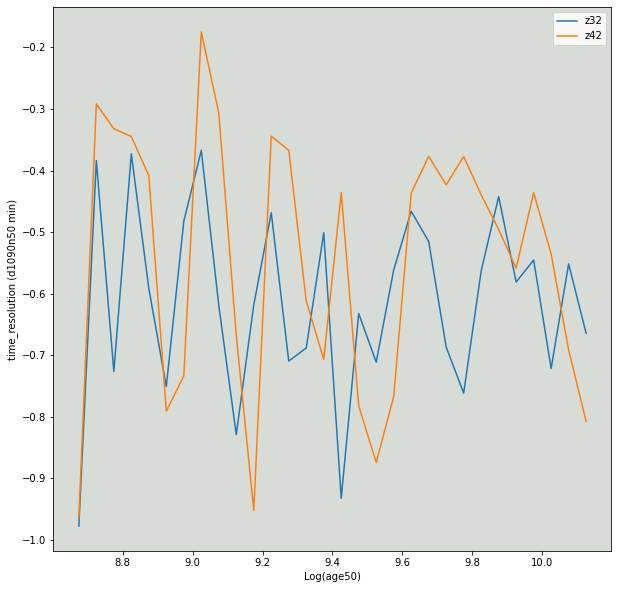

In [41]:
fig, axs=plt.subplots(figsize=(10,10))
axs.plot(age50_binned, t_32, label='z32')
axs.plot(age50_binned, t_42, label='z42')

axs.legend(loc='upper right')
axs.set_facecolor('#d8dcd6')
axs.set_xlabel('Log(age50)')
axs.set_ylabel('time_resolution (d1090n50 min)')

Text(0, 0.5, 'time_resolution (d1090n50 min)')

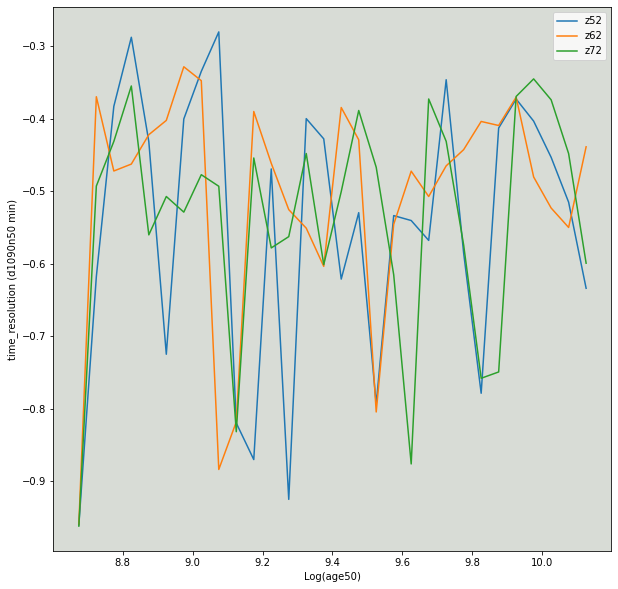

In [42]:
fig, axs=plt.subplots(figsize=(10,10))

axs.plot(age50_binned, t_52, label='z52')
axs.plot(age50_binned, t_62, label='z62')
axs.plot(age50_binned, t_72, label='z72')
axs.legend(loc='upper right')
axs.set_facecolor('#d8dcd6')
axs.set_xlabel('Log(age50)')
axs.set_ylabel('time_resolution (d1090n50 min)')